In [1]:
import numpy as np
import pandas as pd
import math
import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.random import seed
from numpy.random import normal
from numpy.random import multivariate_normal

# DGP

Basic form

Time varying process to generate parameters

$$vec(A_t) - \mu = \rho (vec(A_{t - 1}) - \mu ) + \eta_t$$

$$ vec(A_0) = \mu$$

$$\eta_t \sim \mathcal{N}(0, \Sigma_{\eta_t})$$

$$ 0 < \rho < 1$$

In [2]:
#specify initial parameters
mu = np.array([[0.4], [0], [0], [0.4]])
rho = 0.9
mean = [0, 0, 0, 0]
cov = [[0.001, 0.002, 0.002, 0.002], [0.002, 0.001, 0.002, 0.002], [0.002, 0.002, 0.001, 0.002], [0.002, 0.002, 0.002, 0.001]] #make smaller


In [5]:
#time varying Eta

def eta(t):
    if t == 0:
        return np.zeros((1,4))
    else:
        return np.random.multivariate_normal(mean, cov)

In [42]:
eta(1)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([0.13150609, 0.06989895, 0.07754603, 0.0906232 ])

In [41]:
#generate time varying parameters in vec form

def vecTVP(t):
    if t == 0:
        return mu
    else:
        phi = rho*(vecTVP(t - 1) - mu) + eta(t).reshape(4,1) + mu
        return phi 

In [8]:
#TVP in matrix form
Mu = 0.4*np.identity(2)

def matrixTVP(t):
    if t == 0:
        return Mu
    else:
        phi = rho*(matrixTVP(t - 1) - Mu) + eta(t).reshape((2,2)) + Mu
        return phi

In [10]:
matrixTVP(0)

array([[0.4, 0. ],
       [0. , 0.4]])

In [11]:
matrixTVP(1)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[ 0.42726667, -0.04038375],
       [-0.01681548,  0.41489335]])

In [12]:
matrixTVP(2)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[ 0.38442248,  0.01132993],
       [-0.06996843,  0.34580457]])

In [13]:
matrixTVP(1000)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[0.55574692, 0.11316739],
       [0.10926377, 0.51306335]])

Generating time series observations

$$y_t = A_t y_{t-1} + \epsilon_t$$

$$\epsilon_t \sim \mathcal{N}(0, \Sigma_{\epsilon_t})$$

$$y_0 = [0, 0]'$$

In [43]:
def epsilon(t):
    if t == 0:
        return np.zeros((1,2))
    else:
        return np.random.multivariate_normal(meaneps, sigma)

In [46]:
#generate observations

meaneps = [0,0]
sigma = [[0.5, 0], [0, 0.5]]
#epsilon = np.random.multivariate_normal(meaneps, sigma)

def y(t):
    if t == 0:
        return np.zeros((2, 1))
    else:
        y_t = matrixTVP(t) @ y(t - 1) + epsilon(t).reshape(2,1)
        return y_t

In [47]:
y(1)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[0.24166353],
       [0.19180051]])

In [48]:
y(2)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[-1.9596912 ],
       [-0.39199924]])

In [49]:
y(10)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[ 1.18264762],
       [-0.43348962]])

In [50]:
#plot generated time series
time = [] #Store time indices
a1 = []
a2 = []
a3 = []
a4 = []

for t in range(100):
    time.append(t)
    a1.append(vecTVP(t)[0])
    a2.append(vecTVP(t)[1])
    a3.append(vecTVP(t)[2])
    a4.append(vecTVP(t)[3])

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


In [51]:
a1

[array([0.4]),
 array([0.37295745]),
 array([0.40643244]),
 array([0.24945725]),
 array([0.42841652]),
 array([0.39201133]),
 array([0.47315972]),
 array([0.42065356]),
 array([0.41953537]),
 array([0.18772541]),
 array([0.39473396]),
 array([0.48538307]),
 array([0.49824155]),
 array([0.48398691]),
 array([0.46081911]),
 array([0.48347387]),
 array([0.36571638]),
 array([0.49829491]),
 array([0.42121925]),
 array([0.33682829]),
 array([0.31304291]),
 array([0.22731966]),
 array([0.33748011]),
 array([0.52642829]),
 array([0.52315972]),
 array([0.31917173]),
 array([0.3773349]),
 array([0.44128346]),
 array([0.19959086]),
 array([0.3727834]),
 array([0.65994317]),
 array([0.37067777]),
 array([0.55263914]),
 array([0.36424161]),
 array([0.20686857]),
 array([0.2337701]),
 array([0.17549449]),
 array([0.57387891]),
 array([0.35929897]),
 array([0.31693074]),
 array([0.48038156]),
 array([0.11286978]),
 array([0.49182916]),
 array([0.34599853]),
 array([0.35679392]),
 array([0.31950035])

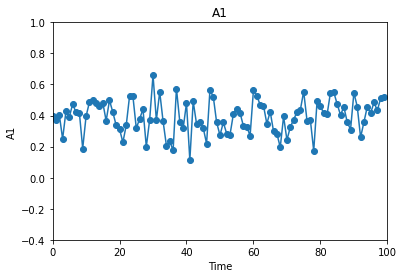

In [52]:
#plot parameter a1

fig, ax = plt.subplots()
ax.plot(time, a1, marker = 'o')
ax.set_ylim([-0.4, 1])
ax.set_xlim([0, 100])
ax.set_xlabel("Time")
ax.set_ylabel("A1")
ax.set_title("A1")
plt.show()

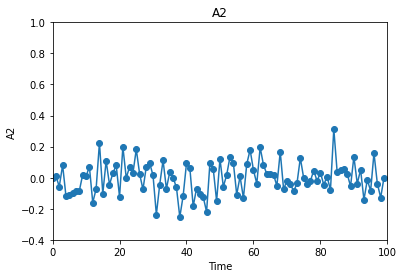

In [53]:
#plot parameter a2

fig, ax = plt.subplots()
ax.plot(time, a2, marker = 'o')
ax.set_ylim([-0.4, 1])
ax.set_xlim([0, 100])
ax.set_xlabel("Time")
ax.set_ylabel("A2")
ax.set_title("A2")
plt.show()

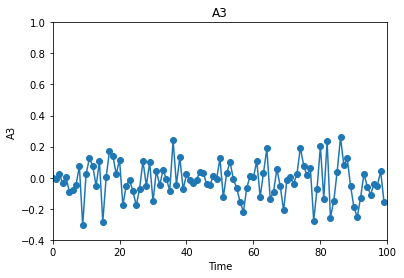

In [54]:
#plot parameter a3

fig, ax = plt.subplots()
ax.plot(time, a3, marker = 'o')
ax.set_ylim([-0.4, 1])
ax.set_xlim([0, 100])
ax.set_xlabel("Time")
ax.set_ylabel("A3")
ax.set_title("A3")
plt.show()

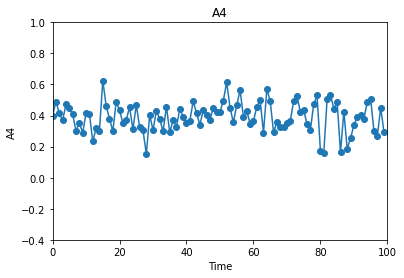

In [55]:
#plot parameter a4

fig, ax = plt.subplots()
ax.plot(time, a4, marker = 'o')
ax.set_ylim([-0.4, 1])
ax.set_xlim([0, 100])
ax.set_xlabel("Time")
ax.set_ylabel("A4")
ax.set_title("A4")
plt.show()

In [56]:
#plot generated time series
x = []
y1 = []
y2 = []

for t in range(50):
    x.append(t)
    y1.append(y(t)[0])
    y2.append(y(t)[1])

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


In [58]:
min(y1)

array([-1.851706])

In [59]:
max(y1)

array([1.74152506])

In [60]:
min(y2)

array([-1.89070855])

In [61]:
max(y2)

array([1.95276969])

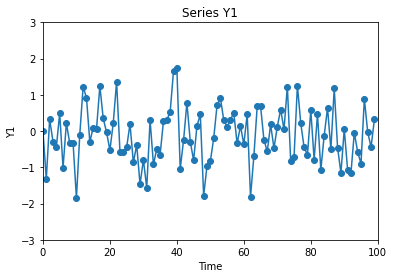

In [62]:
#series y1

fig1, ax1 = plt.subplots()
ax1.plot(x, y1, marker = 'o')
ax1.set_ylim([-3, 3])
ax1.set_xlim([0, 100])
ax1.set_xlabel("Time")
ax1.set_ylabel("Y1")
ax1.set_title("Series Y1")
plt.show()

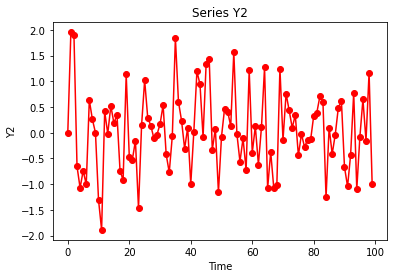

In [63]:
#series y2

fig2, ax2 = plt.subplots()
ax2.plot(x, y2, marker = 'o', color = 'red')
ax1.set_ylim([-2, 2])
ax1.set_xlim([0, 100])
ax2.set_xlabel("Time")
ax2.set_ylabel("Y2")
ax2.set_title("Series Y2")
plt.show()

# ProPar update

$$ vec(A_{t|t}') = [X_t'\Sigma^{-1}X_t + P_t]^{-1} [P_t' vec (A_{t||t-1}') + X_t' \Sigma ^{-1} y_t] $$

Where $$X_t = I_k \otimes x_t'$$


In this case $$x_t = y_{t-1}$$.


In [64]:
P = 10*np.identity(4) #penalty matrix as multiple of identity matrix

In [65]:
def updateMu(t):
    if t == 0:
        return np.reshape(Mu, (4,1), 'C') #update at time t is initial value
    else:
        X = np.kron(np.identity(2), np.transpose(y(t-1))) #Kronecker product
        vecApred = updateMu(t - 1) - eta(t - 1).reshape(4,1) - mu  #prediction step 
        vecAupd = np.linalg.inv(np.transpose(X) @ np.linalg.inv(sigma) @ X + P) @ (np.transpose(P) @ vecApred 
                                                                            + np.transpose(X) @ np.linalg.inv(sigma) @ y(t))
        return vecAupd

In [66]:
updateMu(1)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[0.],
       [0.],
       [0.],
       [0.]])

In [67]:
updateMu(2)

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[-0.27490149],
       [ 0.12671099],
       [-0.09965389],
       [-0.45701111]])

In [68]:
updateMu(1) - np.reshape(Mu, (4,1), 'C')

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


array([[-0.4],
       [ 0. ],
       [ 0. ],
       [-0.4]])

In [ ]:
#generate and store true parameters

trueparams1 = []
trueparams2 = []
trueparams3 = []
trueparams4 = []
X = []

for t in range(50):
    trueparams1.append(vecTVP(t)[0])
    trueparams2.append(vecTVP(t)[1])
    trueparams3.append(vecTVP(t)[2])
    trueparams4.append(vecTVP(t)[3])
    
    X.append(t)

In [69]:
#apply ProPar updates and store
updates1 = []
updates2 = []
updates3 = []
updates4 = []

for t in range(50):
    updates1.append(updateMu(t)[0])
    updates2.append(updateMu(t)[1])
    updates3.append(updateMu(t)[2])
    updates4.append(updateMu(t)[3])

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


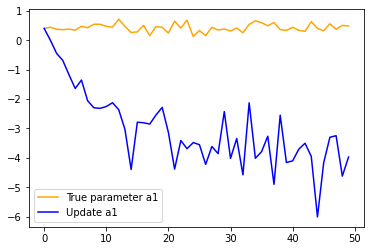

In [74]:
#Param a1
plt.plot(X, trueparams1, label = 'True parameter a1', color = 'orange')
plt.plot(X, updates1, label = 'Update a1', color = 'blue')
plt.legend()
plt.show()

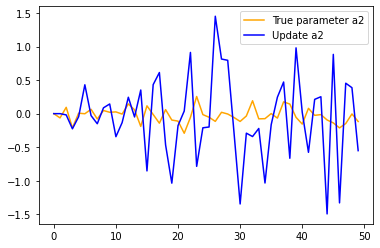

In [71]:
#Param a2
plt.plot(X, trueparams2, label = 'True parameter a2', color = 'orange')
plt.plot(X, updates2, label = 'Update a2', color = 'blue')
plt.legend()
plt.show()

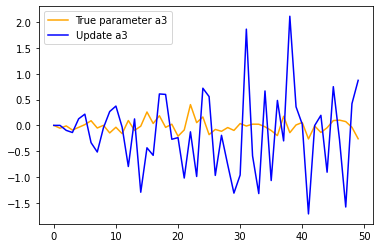

In [72]:
#Param a3
plt.plot(X, trueparams3, label = 'True parameter a3', color = 'orange')
plt.plot(X, updates3, label = 'Update a3', color = 'blue')
plt.legend()
plt.show()

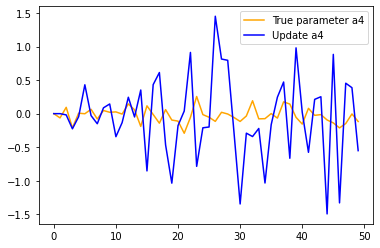

In [73]:
#Param a4
plt.plot(X, trueparams2, label = 'True parameter a4', color = 'orange')
plt.plot(X, updates2, label = 'Update a4', color = 'blue')
plt.legend()
plt.show()

In [77]:
def yProPar(t):
    if t == 0:
        return np.zeros((2, 1))
    else:
        y_t = np.reshape(updateMu(t), (2,2), 'F') @ yProPar(t - 1) + epsilon(t).reshape(2,1)
        return y_t

In [ ]:
MSE1 = []
MSE2 = []

for t in range(50):
    MSE1.append(y(t)[0] - yProPar(t)[0])
    MSE2.append(y(t)[1] - yProPar(t)[1])

In [ ]:
np.mean(MSE1)

In [ ]:
np.mean(MSE2)

In [79]:
ts = []
for t in range(50):
    ts.append(y(t))
    
ts

C:\Users\M-P\AppData\Local\Temp/ipykernel_11668/1767266401.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean, cov)


[array([[0.],
        [0.]]),
 array([[-0.62333771],
        [ 0.48994839]]),
 array([[-0.62430581],
        [-0.41373485]]),
 array([[0.29580476],
        [0.10475714]]),
 array([[ 0.49147075],
        [-0.80106557]]),
 array([[ 0.8106946 ],
        [-0.73647426]]),
 array([[ 0.45137299],
        [-0.09014954]]),
 array([[-0.07525242],
        [ 0.2243858 ]]),
 array([[-0.16352093],
        [ 0.25748105]]),
 array([[-0.57262093],
        [ 0.90984633]]),
 array([[1.13730835],
        [0.0469001 ]]),
 array([[ 0.00943451],
        [-2.35210731]]),
 array([[-0.38813418],
        [ 0.35520825]]),
 array([[-1.04027895],
        [ 0.97201001]]),
 array([[ 0.48824715],
        [-1.20276734]]),
 array([[-0.45079029],
        [ 0.68663328]]),
 array([[ 0.06557873],
        [-0.50050973]]),
 array([[0.18140406],
        [1.06120859]]),
 array([[ 0.58824378],
        [-1.24913104]]),
 array([[ 0.39058721],
        [-0.59552194]]),
 array([[ 0.15759845],
        [-0.24477113]]),
 array([[ 1.2240

In [80]:
#GAS update

def GASMu(t):
    if t == 0:
        return np.reshape(Mu, (4,1), 'C')
    else:
        X = np.kron(np.identity(2), np.transpose(y(t-1)))
        vecApred = np.random.standard_normal((4,1)) 
        trvecApred = np.random.standard_normal((1,4))
        vecAupd = np.linalg.inv(P) @ (np.transpose(X) @ np.linalg.inv(sigma) @ y(t) - X @ vecApred - (1/2)*np.transpose(P) @ trvecApred)
        return vecAupd

In [ ]:
#apply GAS updates and store
GASupdates1 = []
GASupdates2 = []
GASupdates3 = []
GASupdates4 = []

for t in range(50):
    GASupdates1.append(GASMu(t)[0])
    GASupdates2.append(GASMu(t)[1])
    GASupdates3.append(GASMu(t)[2])
    GASupdates4.append(GASMu(t)[3])    

In [ ]:
#Param a1
plt.plot(X, trueparams1, label = 'True parameter a1', color = 'orange')
plt.plot(X, GASupdates1, label = 'GAS Update a1', color = 'blue')
plt.legend()
plt.show()

In [ ]:
#Param a2
plt.plot(X, trueparams2, label = 'True parameter a2', color = 'orange')
plt.plot(X, GASupdates2, label = 'GAS Update a2', color = 'blue')
plt.legend()
plt.show()

In [ ]:
def FisherInformation(y, X, A, sigma):
    return numpy.mean((np.log(multivarNormal(y, X @ A.flatten('C'), sigma)))**2)